# DIGIT RECOGNISER KAGGLE COMPETETIONS.

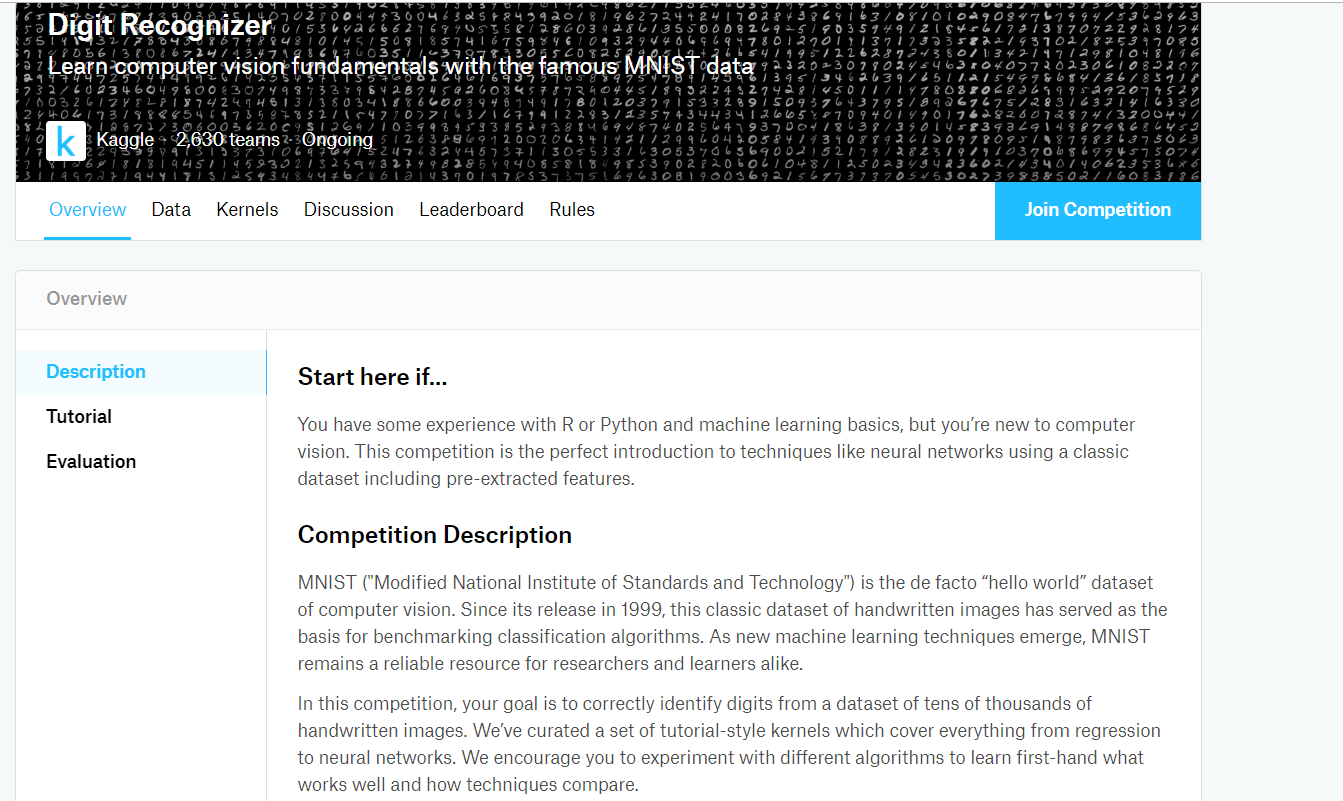

In [1]:
from IPython.display import Image
Image("img1.png")

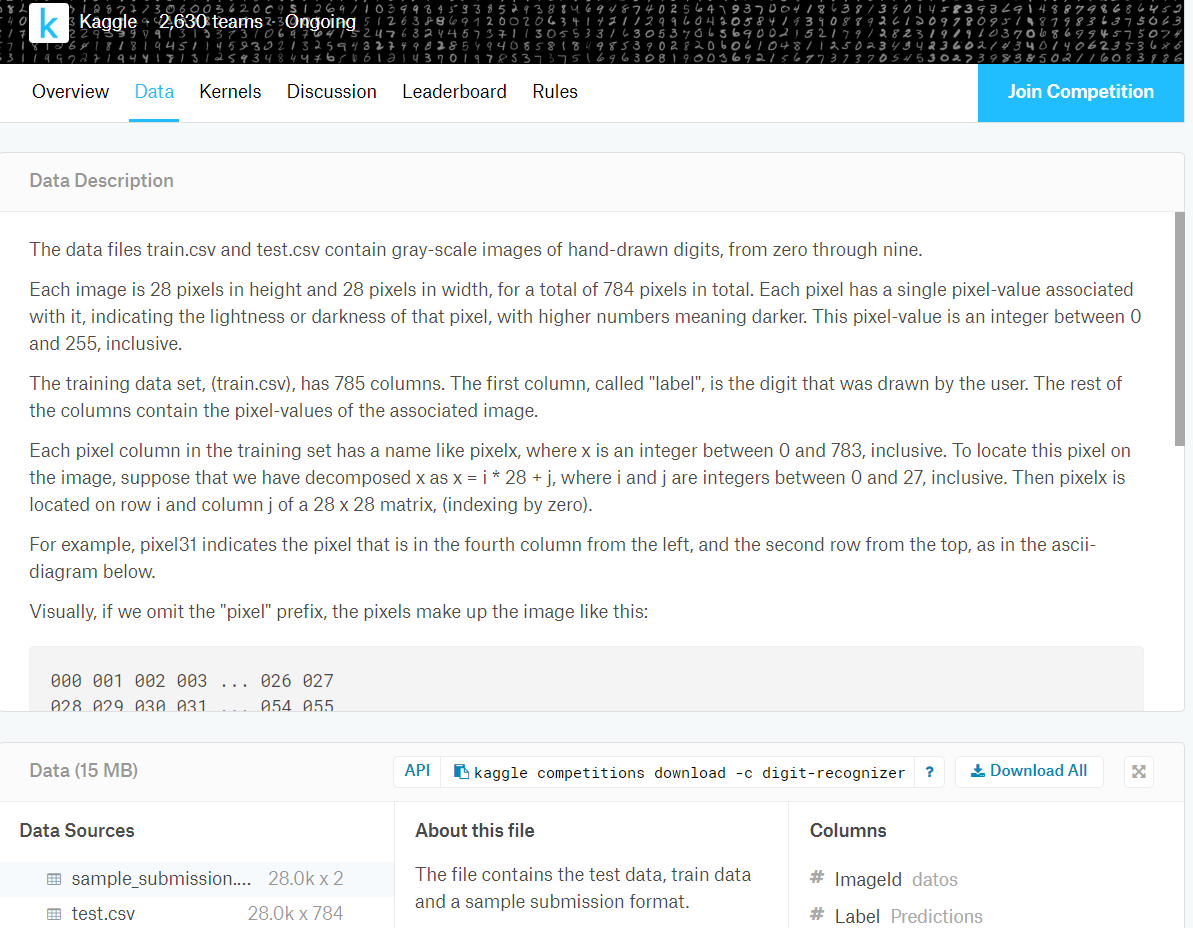

In [2]:
from IPython.display import Image
Image("img2.png")

## STEPS 
1. Introduction
2. Data interpretation and feature engineering
3. CNN
4. convolution NN
5. Evaluation 
6. Model Prediction
7. Model Submission
8. Model saving

## Introduction

*This is a 1 layers Sequential Convolutional Neural Network for digits recognition trained on MNIST dataset. I choosed to build it with keras API (Tensorflow backend) which is very intuitive. Firstly, I will prepare the data (handwritten digits images) then i will focus on the CNN modeling and evaluation.*
I achieved the accuracy of 98.45% with this CNN2d model having a one dense layer and 1 pooling layer.

I set epochs =4


#### importing all the dependencies

In [1]:
#import dependencies
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import seaborn as sns  #visualisations

In [3]:
np.random.seed(2)      #for random selection

##### CNN , keras library and scikit learn 

In [4]:
#one hot encoding
from keras.utils.np_utils import to_categorical 
#keras CNN Model
from keras import Sequential
#layers 
from keras.layers import Dense , Dropout,Flatten,Conv2D,MaxPool2D
#splitting of training and validation sets
from sklearn.model_selection import train_test_split
#to evaluate model and prediction.
from sklearn.metrics import confusion_matrix, classification_report

Using TensorFlow backend.


## Data Preparation 
### Importing Test Data

In [5]:
train = pd.read_csv('train.csv',)

In [6]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### seperating the target lable and training dataset with the help of pandas library

In [8]:
X_train = train.drop(['label'],axis = 1)

In [9]:
X_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


###### Reading our test data set

In [10]:
test = pd.read_csv('test.csv')
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### seperating the test label of the training data set

In [11]:
y_train = train['label']

In [12]:
y_train.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

##### taking example of the one column and visualizing that what image it is of

In [13]:
single_img = X_train.iloc[0] # taking a single image form the dataset

In [14]:
single_img.shape #checking shape of the data set

(784,)

In [15]:
single_img=np.array(single_img)  # converting into numpy array
single_img= single_img.reshape(28,28)    # reshaping into 28ppx * 28 ppx
single_img.shape                         #checking shape

(28, 28)

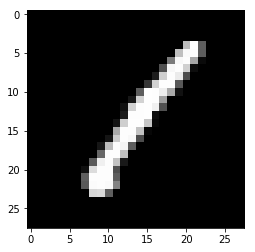

In [16]:
plt.imshow(single_img,cmap='gray')        #visualizing the data set

##### Explotary data analysis

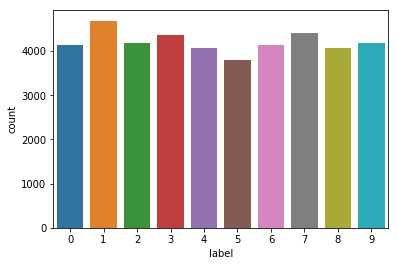

In [17]:
g = sns.countplot(y_train) 

In [18]:
y_train.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [19]:
X_train.isnull().describe() #checking any null value in our data set
#fortunately there is no null value in our dataset.

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000,42000,42000,42000,42000,42000,42000,42000,42000,42000,...,42000,42000,42000,42000,42000,42000,42000,42000,42000,42000
unique,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,42000,42000,42000,42000,42000,42000,42000,42000,42000,42000,...,42000,42000,42000,42000,42000,42000,42000,42000,42000,42000


In [20]:
# normalizing our data set.
# converting this data set into gradient_scale image
# instead of 1-255 we convert values into 0-1
X_train = X_train / 255.0
test = test / 255.0

#### Reshaping the dataset

In [21]:
#reshaping the whole training and train dataset.
# change our data set into categorical features.
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

Train and test images (28px x 28px) has been stock into pandas.Dataframe as 1D vectors of 784 values. We reshape all data to 28x28x1 3D matrices.

Keras requires an extra dimension in the end which correspond to channels. MNIST images are gray scaled so it use only one channel. For RGB images, there is 3 channels, we would have reshaped 784px vectors to 28x28x3 3D matrices.

but our data set contain only grayscale images so we don't need the 3 color channels. thereFore, we provided 1 only for grayscale images. 
1 means 1D vector for grayscale and
3D means for RGB.

In [22]:
#on_hot encoding 

y_train= to_categorical(y_train,num_classes= 10)

In [23]:
# set the random seed

random_seed =2

seperating our data set into different features with the help of scikit learn. converting our training data se into training set and the validation  for evaluating of model the check the accuracy.
 then we will submit our model on the test set

In [24]:
X_train, X_val, Y_train,Y_val = train_test_split(X_train,y_train,test_size = 0.2, random_state = random_seed)

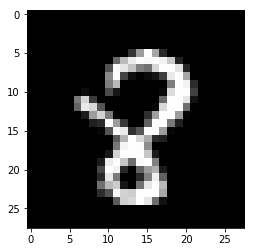

In [38]:
#checking that our training is okay or not
plt.imshow(X_train[1234][:,:,0],cmap = 'gray')

# CNN MODEL

I used the Keras Sequential API, where you have just to add one layer at a time, starting from the input.

The first is the convolutional (Conv2D) layer. It is like a set of learnable filters. I choosed to set 32 filters.

Each filter transforms a part of the image (defined by the kernel size i.e(4,4)) using the kernel filter. The kernel filter matrix is applied on the whole image. Filters can be seen as a transformation of the image.

The second important layer in CNN is the pooling (MaxPool2D) layer. This layer simply acts as a downsampling filter. It looks at the 2 neighboring pixels and picks the maximal value. These are used to reduce computational cost, and to some extent also reduce overfitting. We have to choose the pooling size (i.e the area size pooled each time) more the pooling dimension is high, more the downsampling is important.

Combining convolutional and pooling layers, CNN are able to combine local features and learn more global features of the image.

Dropout is a regularization method, where a proportion of nodes in the layer are randomly ignored (setting their wieghts to zero) for each training sample. This drops randomly a propotion of the network and forces the network to learn features in a distributed way. This technique also improves generalization and reduces the overfitting.

'relu' is the rectifier (activation function max(0,x). The rectifier activation function is used to add non linearity to the network.

The Flatten layer is use to convert the final feature maps into a one single 1D vector. This flattening step is needed so that you can make use of fully connected layers after some convolutional/maxpool layers. It combines all the found local features of the previous convolutional layers.

In the last layer(Dense(10,activation="softmax")) the net outputs distribution of probability of each class.

The metric function "accuracy" is used is to evaluate the performance our model. This metric function is similar to the loss function.

In [42]:
#set the cnn model
# my CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out

model = Sequential()

#CNN 
model.add(Conv2D(filters=32,kernel_size = (4,4),padding = 'Same',input_shape = (28,28,1),activation = 'relu'))

#pooling layer 
model.add(MaxPool2D(pool_size =(2,2)))

#convert 2d--> 1d
model.add(Flatten())

#dense layer

model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [43]:
model.summary() #summarising our model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 804,778
Trainable params: 804,778
Non-trainable params: 0
_________________________________________________________________


In [51]:
model.fit(X_train,Y_train,epochs=4) #choosing epochs =4 

Instructions for updating:
Use tf.cast instead.
Epoch 1/4
33600/33600 [==============================] - 43s 1ms/step - loss: 0.1756 - acc: 0.9457
Epoch 2/4
33600/33600 [==============================] - 42s 1ms/step - loss: 0.0580 - acc: 0.9821
Epoch 3/4
33600/33600 [==============================] - 44s 1ms/step - loss: 0.0396 - acc: 0.9874
Epoch 4/4
33600/33600 [==============================] - 42s 1ms/step - loss: 0.0301 - acc: 0.9915


In [52]:
model.metrics_names

['loss', 'acc']

In [53]:
#evaluating our model on the validation set.
model.evaluate(X_val,Y_val)

8400/8400 [==============================] - 3s 331us/step


[0.05625913343370138, 0.9845238095238096]

In [73]:
#model predict
predictions = model.predict(X_val)

In [74]:
Y_pred = np.argmax(predictions,axis=1)
Y_true = np.argmax(Y_val,axis =1)

In [63]:
len(predictions)

8400

In [67]:
len(Y_val)

8400

### Classification report 

# 98.465%accuracy of the model

In [75]:
print(classification_report(Y_true,Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       821
           1       1.00      0.99      0.99       962
           2       0.99      0.98      0.99       829
           3       0.99      0.98      0.98       864
           4       0.99      0.98      0.99       856
           5       0.98      0.99      0.98       729
           6       0.99      0.98      0.99       839
           7       0.99      0.99      0.99       873
           8       0.96      0.99      0.98       793
           9       0.98      0.97      0.97       834

   micro avg       0.98      0.98      0.98      8400
   macro avg       0.98      0.98      0.98      8400
weighted avg       0.98      0.98      0.98      8400



In [76]:
print(confusion_matrix(Y_true,Y_pred))

[[813   0   0   1   0   2   2   0   2   1]
 [  0 951   1   1   0   1   0   3   3   2]
 [  1   0 816   4   0   0   0   2   4   2]
 [  0   0   1 847   0   5   0   2   6   3]
 [  1   1   0   0 839   1   2   1   3   8]
 [  0   0   0   2   0 722   1   0   4   0]
 [  6   0   0   1   2   4 823   0   3   0]
 [  1   1   5   0   0   0   0 861   2   3]
 [  2   0   0   1   0   1   1   0 787   1]
 [  3   1   0   2   3   3   0   5   6 811]]


### Predicted with test data and submission

In [77]:
#now predict with test class

results = model.predict(test)


In [78]:
results = np.argmax(results,axis=1)

# submission with test data set

In [80]:
results = pd.Series(results,name = 'Label')


submission  =  pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis =1)

submission.to_csv("Cnn_1_Digit_recognizer.csv",index = False)

# Saving the model for further use

we can reload it and predict the values

In [81]:
model.save('digitRecognizerCNN.h5')

# What we can add to improve accuracy is:
1. making model more dense i.e add two Conv2d() and two Dense() in the row to the previous one.
2. setting epochs to 30.
3. optimizer and learning rate to the NN also adding gradient descent algo.
4. for better performance and highly computational features we use google colab.